In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [123]:
data = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')


In [124]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [125]:
data.shape

(10000, 14)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [127]:
data.duplicated().sum()

0

In [128]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [129]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [130]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [131]:
data.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [132]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [133]:
data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)

In [134]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [135]:
dummy_columns = data.select_dtypes(include=['bool']).columns
data[dummy_columns] = data[dummy_columns].astype(int)

In [136]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [137]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [139]:
print('X_train Shape :',X_train.shape)
print('X_test  Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test  Shape :',y_test.shape)

X_train Shape : (8000, 11)
X_test  Shape : (2000, 11)
y_train Shape : (8000,)
y_test  Shape : (2000,)


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [141]:
X_test_scaled 

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [142]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [143]:
model = Sequential()

model.add(Dense(11, activation='sigmoid', input_dim=11))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244 (976.00 B)

 Trainable params: 244 (976.00 B)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [146]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2497 - loss: 0.8818 - val_accuracy: 0.7975 - val_loss: 0.6143
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.5869 - val_accuracy: 0.7975 - val_loss: 0.5262
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.5189 - val_accuracy: 0.7975 - val_loss: 0.5062
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4953 - val_accuracy: 0.7975 - val_loss: 0.4990
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4934 - val_accuracy: 0.7975 - val_loss: 0.4938
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4930 - val_accuracy: 0.7975 - val_loss: 0.4878
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4860 - val_accuracy: 0.7975 - val_loss: 0.4794
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4826 - val_accu

In [147]:
model.layers[0].get_weights()

[array([[ 3.49246711e-01, -1.31507087e-02, -1.83171540e-01,
          1.31504551e-01, -9.43233520e-02, -3.04146726e-02,
         -1.05244853e-01,  4.64388579e-01,  2.68262833e-01,
         -1.87674537e-01, -2.98692465e-01],
        [ 4.48755741e-01,  9.33688283e-01,  2.02932906e+00,
          3.26272428e-01,  3.39012623e-01,  5.02633274e-01,
         -1.81230330e+00, -1.73332024e+00, -2.31144786e+00,
         -1.61118054e+00, -2.35320973e+00],
        [ 3.36186796e-01,  1.42771959e-01,  3.73219758e-01,
          8.28970551e-01, -5.40387258e-02,  7.84818176e-03,
          1.13243304e-01,  1.69353604e-01, -1.70539185e-01,
          4.23704416e-01, -1.22024991e-01],
        [-8.65850806e-01,  8.14106226e-01, -2.60583311e-01,
         -1.05817175e+00, -4.68443185e-01,  1.37107491e-01,
         -1.12540627e+00, -1.00301719e+00, -1.10307264e+00,
         -5.85279524e-01, -8.35953474e-01],
        [-7.11096168e-01,  3.43756604e+00,  7.71546245e-01,
         -5.71374536e-01, -7.85855055e-01, -

In [148]:
model.layers[1].get_weights()

[array([[-0.3564018 , -0.1528029 ,  0.00646672, -0.13145748, -0.26195002,
         -0.18294005,  0.32924947],
        [-1.6483853 ,  2.0274804 ,  1.8527364 , -1.4029828 , -0.91705877,
          1.2914052 ,  0.69074017],
        [ 0.8607219 , -1.7354873 , -1.5771248 ,  1.0049475 ,  1.1722951 ,
         -1.3887925 , -1.0664765 ],
        [ 0.25210398,  0.54788214, -0.07166194, -0.41701236, -0.32416153,
          0.3317357 ,  0.9256419 ],
        [ 0.12099206,  1.069818  ,  0.76795703, -0.3745265 , -0.99425125,
          0.53053606,  0.83100843],
        [-0.93983865,  0.2507892 ,  0.59656763, -0.36223125, -1.0668396 ,
          1.1063738 ,  0.8301415 ],
        [-0.02347791, -0.11938253, -0.05487705,  0.24394181, -0.35226533,
          0.20621535,  0.34971753],
        [-0.4827914 , -0.06296846, -0.29329777, -0.36068234,  0.19088693,
          0.21101406,  0.9699347 ],
        [-0.09179962, -0.2861107 ,  0.12543972,  0.4421322 , -0.53313535,
          0.39884365,  0.5249006 ],
        [-

In [149]:
model.layers[2].get_weights()

[array([[-1.4023492 ,  1.8720684 ,  1.3588775 ],
        [ 1.6704649 , -0.71208435, -1.9115578 ],
        [ 1.0220314 , -1.6578312 , -1.2439157 ],
        [-0.8219211 ,  1.492614  ,  1.7023628 ],
        [-2.4168513 ,  1.8137324 ,  1.561123  ],
        [ 1.2156191 , -1.6555837 , -0.28768027],
        [ 0.8869259 , -0.40122634, -0.7812326 ]], dtype=float32),
 array([-0.42129233,  0.02662553,  0.19892365], dtype=float32)]

In [150]:
model.layers[3].get_weights()

[array([[-2.9744258],
        [ 2.7814531],
        [ 2.4756029]], dtype=float32),
 array([-0.9844456], dtype=float32)]

In [151]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [152]:
y_pred = np.where(y_log>0.5,1,0)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [154]:
import matplotlib.pyplot as plt

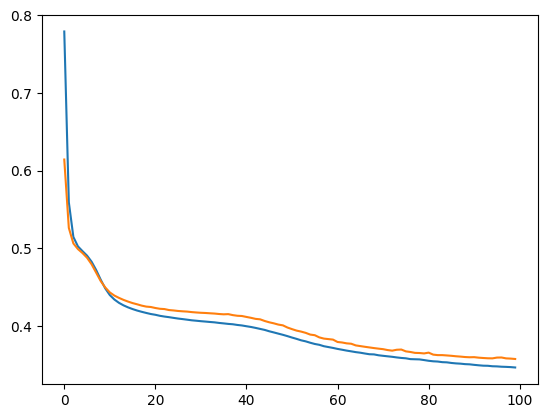

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

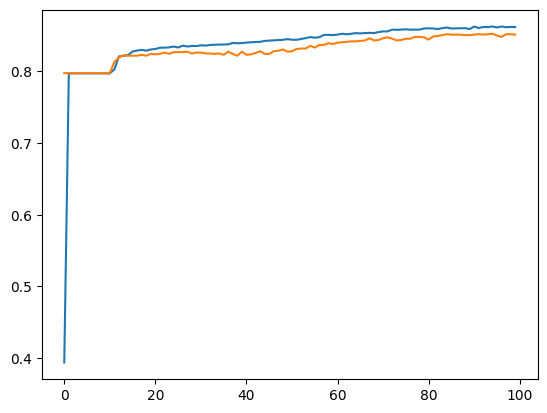

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])